# Анализ рынка популярных игр и платформ.

В данном проекте нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на будущий год.\
В распоряжении имеются исторические данные (до 2016 года) о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation), на основе которых нужно спланировать рекламную компанию на следующий год. 

### Оглавление

2.[Открытие данных. Изучение общей информации](#start)   
3.[Предобработка данных](#preprocessing)
* [Замена типа данных](#int)
* [Обработка пропущенных значений](#null)
* [Проверка на наличие дупликатов](#duplicates)
 
4.[Исследовательский анализ данных](#analysis)
* [Анализ игр по году выпуска](#year)
* [Анализ игр по платформам](#platform)
* [Анализ продаж платформ за актуальный период](#act)
* [Анализ глобальных продаж игр](#glob)
* [Анализ влияния оценок пользователей/критиков на продажи популярной платформы](#score)
* [Распределение игр по жанрам](#genre)

5.[Портрет регионов](#reg)
* [Портрет регионов - популярные платформы](#reg_platform)
* [Портрет регионов - популярные жанры](#reg_genre)
* [Портрет регионов - влияние рейтингов](#reg_rating)

6.[Проверка гипотез](#hipo)
* [Проверка гипотезы №1](#hipo1)
* [Проверка гипотезы №2](#hipo2)

7.[Выводы](#conc)

### Открытие данных. Изучение общей информации. <a id="start"></a>

Выгрузим данные, а также импортируем некоторые библиотеки, которые пригодятся нам в работе.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Данные, с которыми предстоит работать представлены одним датасетом. В нем собрана информация о названии игры, платформе, которой эта игра предназначена, год релиза, ее жанр, продажи по регионам (Сев. Америка, Европа, Япония, другие), оценка критиков, оценка пользователей, возрастная категория согласно рейтингу ESRB. Всего 16715 наблюдений.

### Предобработка данных. <a id=""></a>

Первое, что бросается в глаза - наименование столбцов в непривычном формате. Исправим это.

In [2]:
df.columns = df.columns.str.lower()

Теперь методом info() выведем информацию о данных и их типах.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, видим, что есть пропуски в данных. Также видим, что столбец с датой релиза не в том формате.

#### Замена типа данных. <a id="int"></a>

Тип данных столбца "year_of_release"  float - формата, но это нам не мешает проводить с этим столбцом некие манипуляции, поэтому в данном случае можно оставить его без изменений.

Переведем данные столбца "genre" к нижнему регистру. Столбцы с названиями игр и консолей трогать не будем - все таки название - это имя собственное.

In [4]:
df['genre'] = df['genre'].str.lower()

#### Обработка пропущенных значений<a id="null"></a>

Перед заполнением данных на месте пропущенных значений, посмотрим, где они пропущенны.

In [5]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Итак, видим пропущенные значения в столбце с названием игры - 2 из почти 17 тыс. наблюдений - не так уж и страшно. Пропуски в данных по дате релиза игры - тоже не так страшно, во-первых, из-за малого кол-ва пропусков (меньше 2% от всего объема данных), во-вторых, не думается мне, что год выпуска игры влияет на ее успешность. Есть конечно общая тенденция на рост популярности игр, ввиду их доступности и доступности игровых приставок, а также ввиду увеличения их количества. \
Предполагаю, что закономерности, определяющие успешность игр заключаются жанре игры (тут, благо, тоже всего 2 пропуска), платформе, для которой эта игра предназначена (0 пропусков), а также оценках критиков и пользователей. Т.е. те столбцы, где больше всего пропущенных данных.

Избавимся от тех двух строчек, где у нас были пропуски в названии и жанре. Есть предположение, что это одни и те же строки. Проверим это.

In [6]:
df[(df['name'].isnull()) & (df['genre'].isnull())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Предположение оказалось верным. Дропнем эти 2 строки!

In [7]:
df.dropna(subset=['name', 'genre'], inplace=True)

In [8]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Можно было бы заполнить пропуски в столбце "critic_score" и "user_score" медианой или средним значением, но в таком случае придется пожертвовать дисперсией, поэтому оставим пропуски.

Построим сводник по оценкам пользователей. Но для начала исправим формат данных по этому столбцу.

In [9]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
0.7       2
1.9       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Видим, что присутствует некоторое значение "tbd" - To Be Determined, что означает "будет определено". Видимо, на момент выгрузки данных, информация по оценкам пользователей по ряду игр не была определена, то есть неизвестна. Доля "неопределенок" почти 0,15 - это значительная часть. Удалять мы эти данные не будем. \
Можно на месте "tbd" проставить нулевые значения.

In [10]:
df['user_score'] = df['user_score'].replace('tbd', 0)

Теперь можно заменить тип данных столбца 'user_score'

In [11]:
df['user_score'] = pd.to_numeric(df['user_score'], downcast ='signed')

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [12]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [13]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null float64
rating             9949 non-null object
total_sales        16713 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


#### Проверка на наличие дупликатов. <a id="duplicates"></a>

Проверим на всякий случай датасет на наличие дубликатов.

In [15]:
df.duplicated().sum()

0

Полностью повторяющихся значений нет. Можем приступать к анализу данных!

### Исследовательский анализ данных. <a id="analysis"></a>

#### Анализ игр по году выпуска.<a id="year"></a>

Посмотрим, сколько игр выпускалось в разные годы. Для этого опять построим сводник.

In [16]:
df.groupby('year_of_release')['name'].count()

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

Теперь разобьем наш интервал времени на десятилетия, чтобы определить период активного выпуска игр и платформ.

In [17]:
df.groupby(pd.cut(df['year_of_release'], bins=[1980, 1990, 2000, 2010, 2020], include_lowest=True))['name'].count()

year_of_release
(1979.999, 1990.0]      221
(1990.0, 2000.0]       2103
(2000.0, 2010.0]      10098
(2010.0, 2020.0]       4022
Name: name, dtype: int64

Видно, что в период с 1980 по 1990 игр выпускалось мало (доля выпускаемых в этот временной интервал составляет 0,013 от общего кол-ва игр, выпущенных в рассматриваемый в данном датасете период. Можем спокойно рассматривать в дальнейшем анализе игры выпущенные с 1991 г. Нельзя также не отметить период с 2000 по 2010 гг, в который было выпущено более 60% игр от всего кол-ва игр. Далее наблюдается спад.

#### Анализ игр по платформам.<a id="platform"></a>

Посмотрим, как менялись продажи по платформам, посмотрим на жизненный период платформ. Для этого создадим сводную таблицу.

In [18]:
data = pd.pivot_table(df, index='year_of_release', \
                       values='total_sales', columns='platform', aggfunc='sum')
data

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980.0,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981.0,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982.0,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983.0,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984.0,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985.0,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986.0,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987.0,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988.0,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Теперь посчитаем как долго жила каждая платформа.

In [19]:
datasets = data.columns.tolist()
set = {}
for dataset in datasets:
    set[dataset] = len(data) - data[dataset].isnull().sum()

In [20]:
set

{'2600': 10,
 '3DO': 2,
 '3DS': 6,
 'DC': 7,
 'DS': 11,
 'GB': 13,
 'GBA': 8,
 'GC': 7,
 'GEN': 5,
 'GG': 1,
 'N64': 7,
 'NES': 12,
 'NG': 4,
 'PC': 26,
 'PCFX': 1,
 'PS': 10,
 'PS2': 12,
 'PS3': 11,
 'PS4': 4,
 'PSP': 12,
 'PSV': 6,
 'SAT': 6,
 'SCD': 2,
 'SNES': 10,
 'TG16': 1,
 'WS': 3,
 'Wii': 11,
 'WiiU': 5,
 'X360': 12,
 'XB': 9,
 'XOne': 4}

Получаем список, где в качестве ключа выступает название платформы, в качестве значения - срок ее жизни (в годах). \
Построим сводную таблицу по суммарным продажам платформ и отсортируем ее для выявления лидеров продаж.

In [21]:
df.pivot_table(index='platform', values='total_sales', aggfunc='sum') \
              .sort_values(by='total_sales', ascending=False).head(10)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Явно выделяются первые 6 платформ - разница между 6 и 7 позициями больше почти в два раза. Поэтому рассмотрим первые 6 платформ. Посмотрим на их период жизни.

In [22]:
print('Срок жизни PS2:', set['PS2'], 'лет \n \r' 
     'Срок жизни X360:', set['X360'], 'лет \n \r' 
     'Срок жизни PS3:', set['PS3'], 'лет \n \r'
     'Срок жизни Wii:', set['Wii'], 'лет \n \r'
     'Срок жизни DS:', set['DS'], 'лет \n \r'
     'Срок жизни PS:', set['PS'], 'лет \n \r')

Срок жизни PS2: 12 лет 
Срок жизни X360: 12 лет 
Срок жизни PS3: 11 лет 
Срок жизни Wii: 11 лет 
Срок жизни DS: 11 лет 
Срок жизни PS: 10 лет 
 


Как видим, наиболее успешные в продажах платформы существуют на рынке около 10 лет. \
Посмотрим на платформы, которые находятся в конце этого списка.

In [23]:
df.pivot_table(index='platform', values='total_sales', aggfunc='sum') \
              .sort_values(by='total_sales', ascending=True).head(10)

,total_sales
platform,
PCFX,0.03
GG,0.04
3DO,0.10
TG16,0.16
WS,1.42
NG,1.44
SCD,1.86
DC,15.95
GEN,28.35


Посмотрим на период жизни 4 антитоповых платформ.

In [24]:
print('Срок жизни PCFX:', set['PCFX'], 'год \n \r' 
     'Срок жизни GG:', set['GG'], 'год \n \r' 
     'Срок жизни 3DO:', set['3DO'], 'года \n \r'
     'Срок жизни TG16:', set['TG16'], 'год \n \r'
     )

Срок жизни PCFX: 1 год 
Срок жизни GG: 1 год 
Срок жизни 3DO: 2 года 
Срок жизни TG16: 1 год 
 


Как видим, срок жизни неуспешных платформ составляет менее трех лет.

Построим распределение по годам для топовых 6 платформ.

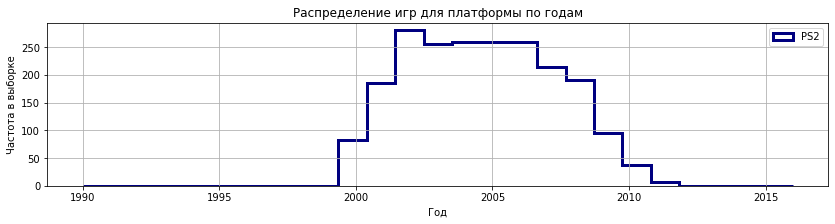

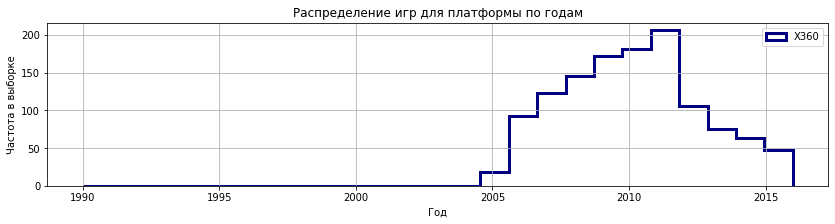

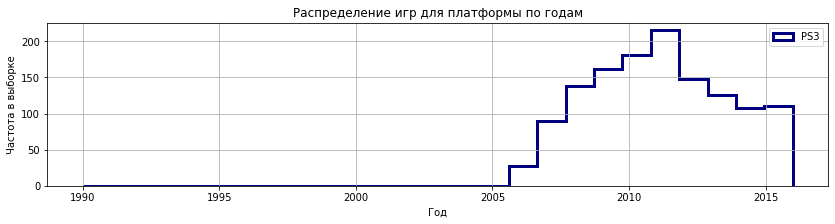

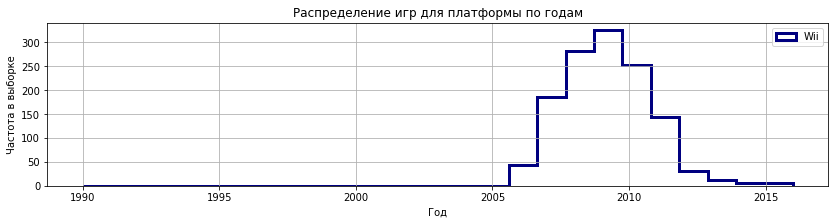

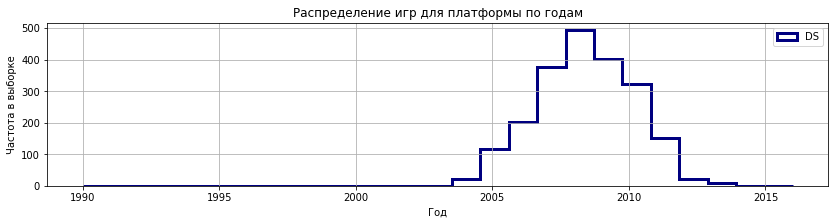

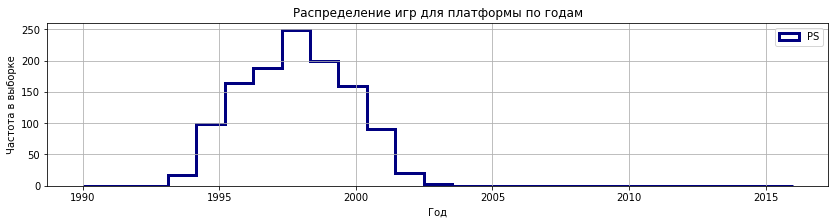

In [25]:
top = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
for platform in top:
    df_top = df.query('platform == @platform')
    df_top['year_of_release'].plot(kind='hist', histtype='step', \
                                   range=(1990, 2016), figsize =(14, 3), linewidth = 3,
    bins=25, grid=True, colormap = 'jet')
    plt.title("Распределение игр для платформы по годам")
    plt.xlabel("Год")
    plt.ylabel("Частота в выборке")
    plt.legend([platform])
    plt.show()

Ранее нами уже было отмечено, что имеет смысл рассматривать продажи игр (а также платформы для них) начиная с 1991 г. Построенные распределения продаж топовых игр как раз приходятся на этот период (PS вышла 1995г), через 5 лет в 2000г выходит PS2 (в это время продажи 1-ой модели идут на спад). Примерно в одно и тоже время (2005-2006гг) выходят 4 приставки: X360, PS3, Wii, DS. В это время уже нет PS, PS2 на пике продаж. X360, PS3, Wii и DS уже набирают обороты и достигают своего пика - 2010-2011 гг (DS чуть раньше остальных - в 2008 г), тогда как PS2 уже выходит из игры.\
Опираясь на наблюдаемую картину, можем предположить, что в нашем наборе данных есть некая платформа, чей возраст менее 10 лет, вышедшая примерно в период 2009-2011 гг, которая придет на смену X360, PS3, Wii и наберет обороты в 2017-2018 гг. **Актуальным периодом** будем считать период начиная с 2012 г.

#### Анализ продаж платформ за актуальный период.<a id="act"></a>

Посмотрим, какие платформы лидируют по продажам, растут или падают. Удастся ли нам найти потенциального кандидата на лидера продаж в 2017 г.\
Повторим прошлую манипуляцию. Как уже было отмечено ранее, продажа приставок PS3, X360, Wii, DS после 2010-2011 гг пошли на убыль. Поэтому исключим их из нашего датасета.

In [26]:
data = df.query('year_of_release >= 2012 and platform != "PS3" and platform != "X360" \
                and platform != "Wii" and platform != "DS"')

In [27]:
sort_data = data.pivot_table(index='platform', values='total_sales', aggfunc='sum') \
              .sort_values(by='total_sales', ascending=False)
sort_data

,total_sales
platform,
PS4,314.14
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
PSP,11.19


Построим гистограммы и для данного датасета. 

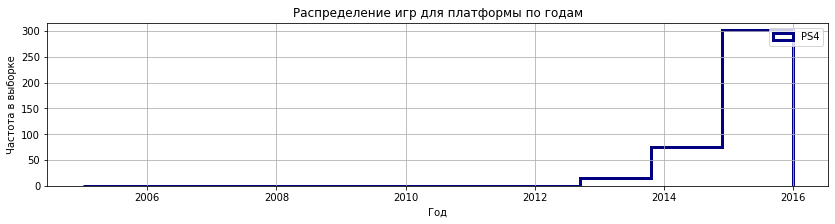

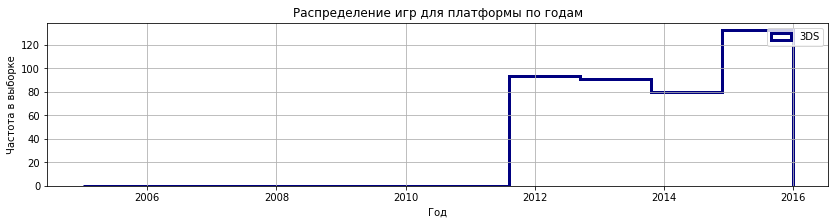

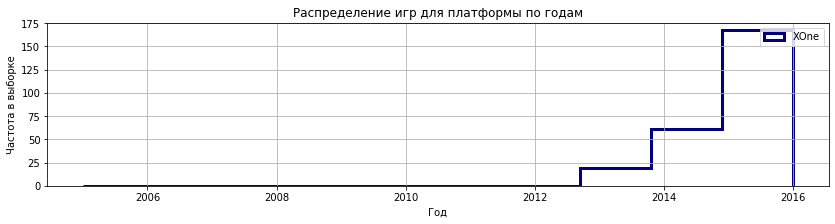

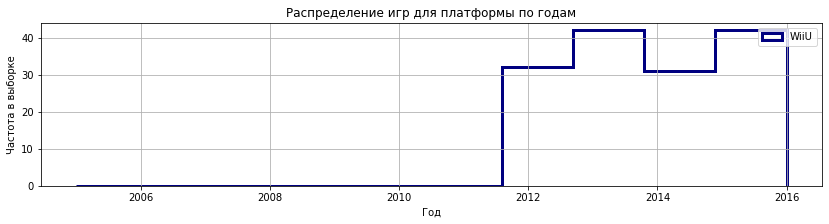

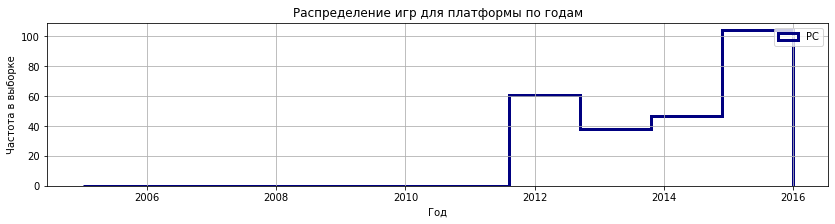

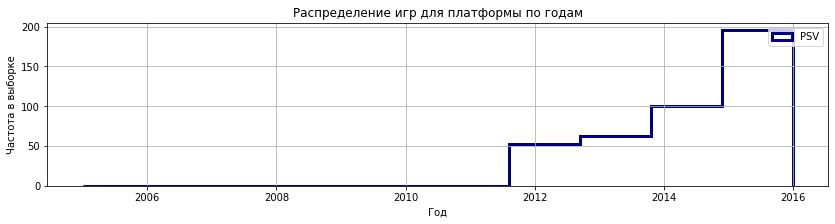

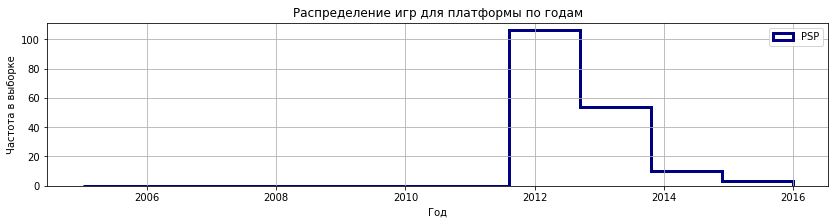

In [28]:
data_top = ['PS4', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'PSP']
for platform in data_top:
    data_top = data.query('platform == @platform')
    data_top['year_of_release'].plot(kind='hist', histtype='step', \
                                   range=(2005, 2016), figsize =(14, 3), linewidth = 3,
    bins=10, grid=True, colormap = 'jet')
    plt.title("Распределение игр для платформы по годам")
    plt.xlabel("Год")
    plt.ylabel("Частота в выборке")
    plt.legend([platform])
    plt.show()

Видим, что потенциально лидерами продаж будут игры для приставок PS4, 3DS, XOne, PSV (причем, показатели продаж в 2016 г выше у PS4, нежели у XOne и PSV), возможно PC, в целом, показатели продаж компьютерных игр имеют странное поведение. Не отрицаю популярность на 2017 и приставки WiiU. Все таки у PS4 и XOne более уверенные позиции. Приставка PSP явно не будет пользоваться популярностью после 2016 г. Разработчикам игр стоит обратить на это внимание.

#### Анализ глобальных продаж игр.<a id="glob"></a>

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам за актуальный период.

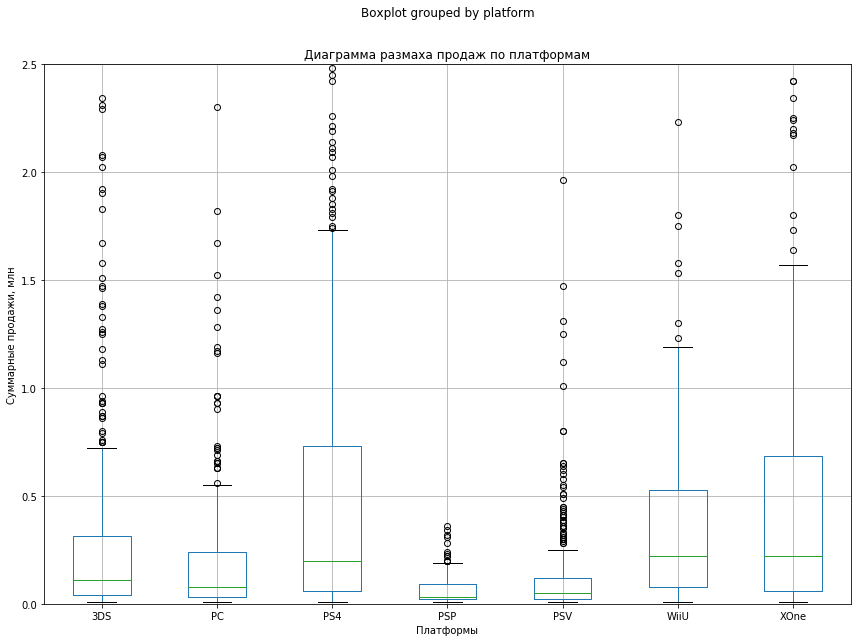

In [29]:
import warnings
warnings.filterwarnings('ignore')
data.boxplot(column='total_sales', by='platform', figsize=(14, 10))
plt.title('Диаграмма размаха продаж по платформам')
plt.ylabel('Суммарные продажи, млн')
plt.ylim(0,2.5)
plt.xlabel('Платформы')
plt.show()

Если посмотреть на диаграммы размаха продаж платформ за актуальный период, можно заметить общую для всех платформ тенденцию - длинный "вверхний ус". Это значит, что наши данные скошены, значит большое количество продаж больше медианной суммы. Также не обошлось и без выбросов в данных. Причем, самые "жирные" хвосты выбросов имеют PC, PSP, PSV, PS4 и 3DS.

#### Анализ влияния оценок пользователей/критиков на продажи популярной платформы. <a id="score"></a>

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Возьмем, к примеру, PS4.

In [30]:
data_PS4 = data.query('platform == "PS4"')

In [31]:
data_PS4.dropna(subset=['critic_score', 'user_score'], inplace=True)

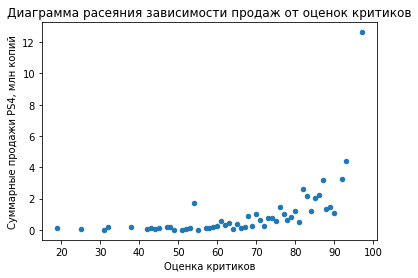

In [33]:
data_PS4.pivot_table(index='critic_score', values='total_sales').reset_index() \
    .plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Диаграмма расеяния зависимости продаж от оценок критиков')
plt.ylabel('Суммарные продажи PS4, млн копий')
plt.xlabel('Оценка критиков')
plt.show()

В целом, с ростом оценки критиков, наблюдаем рост продажи игр для данной платформы. Однако, нельзя это наблюдение назвать однозначным \
Найдем корреляцию этих двух величин для ясности.

In [34]:
data_PS4['critic_score'].corr(data_PS4['total_sales'])

0.40600211593500984

Итак, видим, что коэффициент Пирсона примерно 0.4, а значит, связь между суммарными продажами и оценкой критиков слабая. Однозначно рассуждать о влиянии одной величины на другую не стоит.\
Посмотрим на влияние оценок покупателей.

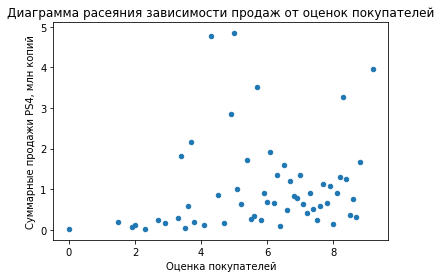

In [35]:
data_PS4.pivot_table(index='user_score', values='total_sales').reset_index() \
    .plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Диаграмма расеяния зависимости продаж от оценок покупателей')
plt.ylabel('Суммарные продажи PS4, млн копий')
plt.xlabel('Оценка покупателей')
plt.show()

В данном случае, картина еще менее одназначна. Много разбросанных значений, например, максимальные значения по суммарным продажам с оценкой пользователя 4-5 из 10. И наоборот, есть игры для данной платформы с высокими показателями от потребителя и низким суммарным значением продаж.\
Найдем коэффициент Пирсона для этого случая.

In [36]:
data_PS4['user_score'].corr(data_PS4['total_sales'])

-0.01114558522006412

Как и предполаголось - связи между оценкой пользователей и продажами нет, о чем нам говорит коэф. Пирсона, близкий к нулю.\
Посмотрим на пару других платформ. 

In [37]:
data_3DS = data.query('platform == "3DS"')
data_3DS.dropna(subset=['critic_score', 'user_score'], inplace=True)

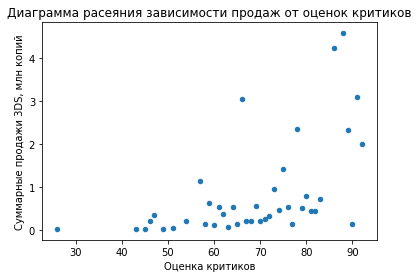

In [38]:
data_3DS.pivot_table(index='critic_score', values='total_sales').reset_index() \
    .plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Диаграмма расеяния зависимости продаж от оценок критиков')
plt.ylabel('Суммарные продажи 3DS, млн копий')
plt.xlabel('Оценка критиков')
plt.show()

In [39]:
data_3DS['critic_score'].corr(data_3DS['total_sales'])

0.3208028695360785

Аналогичный результат - оценки критиков не имеют особого влияния на продажи игр для платформы 3DS.\
Рассмотрим второй фактор - оценку пользователей.

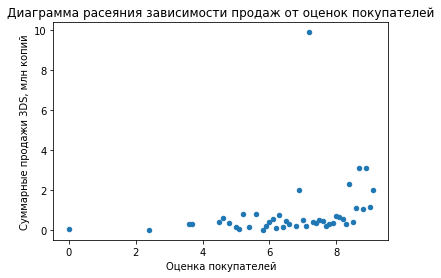

In [40]:
data_3DS.pivot_table(index='user_score', values='total_sales').reset_index() \
    .plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Диаграмма расеяния зависимости продаж от оценок покупателей')
plt.ylabel('Суммарные продажи 3DS, млн копий')
plt.xlabel('Оценка покупателей')
plt.show()

In [41]:
data_3DS['user_score'].corr(data_3DS['total_sales'])

0.20827238077969662

Снова похожая картина - влияние оценки пользователей на продажи незначительно, если вообще есть.\
Рассмотрим еще пример. На этот раз возьмем приставку из середины нашего рейтинга самых продаваемых платформ за актуальный период - WiiU.

In [42]:
data_WiiU = data.query('platform == "WiiU"')
data_WiiU.dropna(subset=['critic_score', 'user_score'], inplace=True)

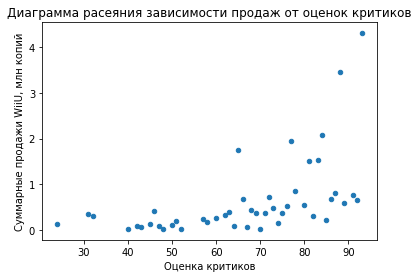

In [43]:
data_WiiU.pivot_table(index='critic_score', values='total_sales').reset_index() \
    .plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Диаграмма расеяния зависимости продаж от оценок критиков')
plt.ylabel('Суммарные продажи WiiU, млн копий')
plt.xlabel('Оценка критиков')
plt.show()

In [44]:
data_WiiU['critic_score'].corr(data_WiiU['total_sales'])

0.34837976012017485

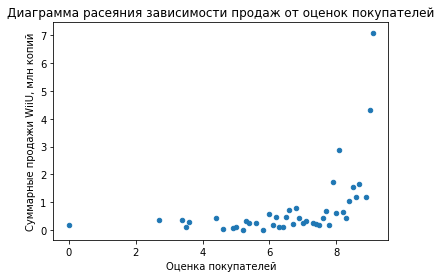

In [45]:
data_WiiU.pivot_table(index='user_score', values='total_sales').reset_index() \
    .plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Диаграмма расеяния зависимости продаж от оценок покупателей')
plt.ylabel('Суммарные продажи WiiU, млн копий')
plt.xlabel('Оценка покупателей')
plt.show()

In [46]:
data_WiiU['user_score'].corr(data_WiiU['total_sales'])

0.36667608026328113

Итак, во всех случаях (по трем приставкам и по 2-ум параметрам для каждой - оценке покупателей и оценке критиков) мы видим, что оценка не особо влияет на продажу игр для той или иной платформы.

#### Распределение игр по жанрам. <a id="genre"></a>

Построим сводную таблицу, котая покажет нам как распределены игры по жанрам в актуальный период времени.

In [47]:
data.groupby('genre')['name'].count().sort_values(axis=0, ascending=False)

genre
action          723
role-playing    291
adventure       239
sports          152
misc            139
shooter         136
racing           72
platform         64
strategy         60
fighting         60
simulation       58
puzzle           22
Name: name, dtype: int64

Для сравнения, выведем такую же сводную таблицу, но за оставшийся период, представленный в датасете изначально.

In [48]:
df.query('year_of_release < 2009').groupby('genre')['name'].count() \
    .sort_values(axis=0, ascending=False)

genre
sports          1548
action          1540
misc             939
racing           905
role-playing     810
shooter          796
platform         696
adventure        590
fighting         585
simulation       517
strategy         439
puzzle           376
Name: name, dtype: int64

Итак, видим, что до 2009 г. больше всего игр было в следующих жанрах (топ-5): sports, action, misc, racing, role-playing. В 2009 г и далее рейтинг популярных жанров выглядит следующим образом: action, adventure, role-playing, sports, misc. Любопытно, что спортивные игры так уступили, а в актуальном периоде появился приключенческий жанр.

Теперь построим сводник по продажам жанров. Посмотрим, какой жанр продается лучше всего.

In [49]:
data.pivot_table(index='genre', values='total_sales', aggfunc='sum') \
        .sort_values(by='total_sales', ascending=False)

,total_sales
genre,
action,231.20
shooter,171.64
role-playing,150.24
sports,97.62
platform,51.66
misc,42.99
racing,33.52
simulation,31.38
fighting,28.52


Пятерка лидеров продаж по жанрам выглядит следующим образом: action, role-playing, shooter, sports, platform. Жанр action и продается лучше других, и популярнее остальных, так сказать, безусловный лидер. Примечательно, что игр жанра shooter меньше почти в два раза, чем игр жанра adventure (см. первый рейтинг), однако продажи у жанра shooter в разы выше.\
Значения продаж топ-3 и нижних 3 рейтинга различаются на порядок.\
Может, жанр action продается так хорошо за счет своего кол-ва или же за счет топовых игр? Проверим этот момент.

In [50]:
data.pivot_table(index='genre', values='total_sales', aggfunc='median') \
        .sort_values(by='total_sales', ascending=False)

,total_sales
genre,
shooter,0.465
platform,0.225
sports,0.200
role-playing,0.120
fighting,0.120
simulation,0.110
racing,0.110
misc,0.100
action,0.090


Действительно, action далеко не на первом месте по медианному значению. Лидер в данном случае шутеры.\
Посмотрим на кол-во игр каждого жанра.


In [51]:
data.pivot_table(index='genre', values='total_sales', aggfunc='count') \
        .sort_values(by='total_sales', ascending=False)

,total_sales
genre,
action,723
role-playing,291
adventure,239
sports,152
misc,139
shooter,136
racing,72
platform,64
fighting,60


Видим, что shooter меньше. Но в пересчете на единицу игры продаж у них больше. То есть это более интересный жанр для покупателей. Скорее всего высокие показатели продаж жанра action обусловлены большим кол-вом игр, в т.ч. бестселлеров.

### Портрет регионов.<a id="reg"></a>

Рассмотрим теперь показатели продаж по регионам и посмотрим есть ли различия, если есть, то насколько они сильны.

#### Портрет регионов - популярные платформы.<a id="reg_platform"></a>

In [52]:
metric_set = ['na_sales', 'eu_sales', 'jp_sales']
for element in metric_set:
    result = data.groupby('platform').agg({element:['count', 'sum', 'mean']}).reset_index()\
    .sort_values(by=(element, 'sum'), ascending=False).head()
    print(result)

  platform na_sales                  
              count     sum      mean
2      PS4      392  108.74  0.277398
6     XOne      247   93.12  0.377004
0      3DS      396   55.31  0.139672
5     WiiU      147   38.10  0.259184
1       PC      250   19.12  0.076480
  platform eu_sales                  
              count     sum      mean
2      PS4      392  141.09  0.359923
6     XOne      247   51.59  0.208866
0      3DS      396   42.64  0.107677
1       PC      250   37.76  0.151040
5     WiiU      147   25.13  0.170952
  platform jp_sales                 
              count    sum      mean
0      3DS      396  87.79  0.221692
4      PSV      411  21.04  0.051192
2      PS4      392  15.96  0.040714
5     WiiU      147  13.01  0.088503
3      PSP      173  10.47  0.060520


Итак, разложили по регионам продажи платформ и выделили из них топ-5. В таблице представлены суммы продаж по соответствующим платформам, а так же доля продаж от общей суммы продаж платформ в данном регионе.\
Что же видим: одна из платформ - PS4, которая, как предполагается, будет на волне продаж в 2017, в Европе и Северной Америке находится на 1-месте и доля ее продаж составляет около трети от всех продаж в каждом регионе. В Японии (интересно, кстати, почему в отличие от остальных регионов, тут рассматривается одна страна, а не регион Азия в целом) PS4 находится лишь на 3-м месте, а доля продаж незначительна (0.04).\
Вторая приставка, которая, предположительно, будет в топе продаж - XOne - вообще не попала в топ-продаваемых платформ в Японии, в Северной Америке данная платформа находится на втором месте рейтинга, доля продаж составляет чуть меньше 0.4, что как мне кажется, является достаточно хорошим показателем. В Европе XOne занимает также 2-е место рейтинга с долей продаж 0.2.\
Более уверенно себя чувствует платформа 3DS - она имеется в рейтинге всех регионов. В Америке она на 3-ем месте с долей продаж 0.14. В Европе она также на 3-м месте, доля - 0.11. В Японии 3DS лидер рейтинга продаж с долей 0.22.\
Неожиданно, но PSV имеется среди топ-5 продаваемых приставок только в рейтинге Японии с долей продаж 0.05. Думаю, что не надо рассчитывать на взлет продаж этой приставки в 2017г.\
Компьютерные игры (PC) есть в топе в Америке (5-е место, доля 0.07) и Европе (4-е место, доля 0,15), в Японии - нет, поскольку на рынке игр в Японии все таки больше делается упор на приставки, а не на компьютерные игры - так уж повелось. Не самая уверенна позиция.\
И, наконец, WiiU - приставка с неоднозначным показателем продаж с 2009 по 2016. Почти стабильно на 4-м месте нашего рейтинга продаж по регионам (только в Европе на 5-ом). Доля в Северной Америке составляет 0.26, в Европе - 0.17, Японии - 0.09. \
Примечательно также то, что в рейтинге Японии среди самых продаваемых приставок фигурирует PSP, которая не входит в число претендентов на популярность в 2017!\
Из первоначального пула перспективных приставок PS4, XOne, 3DS, PCV, PC и WiiU, где первые 2 приставки - явные лидеры, последние 2 - сомнительные, после рассмотрения сводников продаж по регионам, я бы оставила в этом перечне PS4, XOne, 3DS и WiiU.

####  Портрет регионов - популярные жанры.<a id="reg_genre"></a>

Посмотрим теперь как распределены жанры по регионам.

In [53]:
for element in metric_set:
    result = data.groupby('genre').agg({element:['count', 'sum', 'mean']}).reset_index()\
    .sort_values(by=(element, 'sum'), ascending=False).head()
    print(result)

           genre na_sales                 
                    count    sum      mean
0         action      723  85.45  0.118188
8        shooter      136  77.76  0.571765
7   role-playing      291  46.92  0.161237
10        sports      152  38.79  0.255197
4       platform       64  20.82  0.325312
           genre eu_sales                 
                    count    sum      mean
0         action      723  83.20  0.115076
8        shooter      136  67.62  0.497206
10        sports      152  41.32  0.271842
7   role-playing      291  38.48  0.132234
4       platform       64  17.81  0.278281
          genre jp_sales                 
                   count    sum      mean
7  role-playing      291  53.87  0.185120
0        action      723  37.68  0.052116
3          misc      139  10.94  0.078705
9    simulation       58   9.67  0.166724
4      platform       64   8.55  0.133594


В Северной Америке и Европе очень похожий рейтинг продаж: первые две строки занимают такие жанры как action и shooter (доли продаж очень близки по значению), 3-е и 4-е места в Америке (и наоборот, в Европе) занимают role-playing и sports. И  последние места вновь повторяются.\
Что касается Японии, региона, отдаленного от первых 2-ух (в чем, как я полагаю, и кроется такое отличие), то здесь такой жанр как shooter не пользуется популярностью, самый же популярный - role-playing (с наибольшей долей продаж), предположительно это связано с тем, что большинство японцев одиноки, т.к. большинство из них (кому по карману такие развлечения) проводят основную часть времени на работе и в дороге на работу (отсюда, кстати, непопулярность компьютерных игр, ведь удобнее в дороге играть на приставке). Также в рейтинге Японии, в отличие от предыдущих регионов, есть жанры misc и simulation (предполагаю наличие этого жанра по той же причине, что и role-playing) - они занимают средние позиции рейтинга. Также как и в Европе platform на последнем месте. Наличие жанра action (пусть и не на первом месте) подтверждает тот факт, что action является самым популярным жанром вреди остальных.

#### Портрет регионов - влияние рейтингов.<a id="reg_rating"></a>

Посмотрим, какие вообще значения в столбце рейтинга у нас есть.

In [54]:
data['rating'].unique()

array([nan, 'M', 'E', 'T', 'E10+'], dtype=object)

Заменим nan на N/I - no information

In [55]:
data['rating'] = data['rating'].fillna('N/I')

Посмотрим, влияет ли рейтинг ESRB на продажи.

In [56]:
for element in metric_set:
    result = data.groupby('rating').agg({element:['count', 'sum', 'mean']}).reset_index()\
    .sort_values(by=(element, 'sum'), ascending=False).head()
    print(result)

  rating na_sales                  
            count     sum      mean
2      M      293  106.53  0.363584
3    N/I      998   73.03  0.073176
0      E      249   65.95  0.264859
1   E10+      206   40.02  0.194272
4      T      270   39.97  0.148037
  rating eu_sales                  
            count     sum      mean
2      M      293  103.98  0.354881
0      E      249   70.34  0.282490
3    N/I      998   68.71  0.068848
4      T      270   36.35  0.134630
1   E10+      206   30.61  0.148592
  rating jp_sales                 
            count    sum      mean
3    N/I      998  91.87  0.092054
0      E      249  24.33  0.097711
4      T      270  15.63  0.057889
2      M      293   9.15  0.031229
1   E10+      206   7.63  0.037039


Наблюдаем следующую картину: очень схожее распределение продаж по рейтингу в Европе и Америке.\
Если в Европе и Америке предпочитают игры жанра для взрослых (М), то японцы - игры, с неопределенным рейтингом жанра. Скорее всего, это связано с тем, что ESRB работает на территории Северной Америки, поэтому у игр, популярных в Японии, нет рейтинга в данной организации.

Итак, в этой части работы мы рассмотрели как в регионах распределены продажи игр в зависимости от типа приставки, жанра игры и ее рейтинга. Это, во-первых, помогло нам отсечь приставки, которые на первый взгляд показались перспективными, а, во-вторых, информация по предпочитаниям потребителей в области жанра игры и ее рейтинга ESRB позволит оптимизировать продажи.

### Проверка гипотез.<a id="hipo"></a>

Проверим 2 гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action и Sports разные.

#### Проверка гипотезы №1.<a id="hipo1"></a>

Н0 в первом случае будет звучать так: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"\
Н1: "Средние пользовательские рейтинги платформ Xbox One и PC различаются"\
Сформируем 2 выборки: для XOne и PC, а затем сравним их дисперсии.

In [57]:
data_XOne = data.query('platform == "XOne"')
data_XOne.dropna(subset=['user_score'], inplace=True)

In [58]:
data_PC = data.query('platform == "PC"')
data_PC.dropna(subset=['user_score'], inplace=True)

Используем тест Левена, для для сравнения дисперсий двух выборок и определить параметр equal_var

In [59]:
from scipy.stats import levene
stat, p = levene(data_PC['user_score'], data_XOne['user_score'])
p

0.6530507393464522

Подобное значение параметра p означает, что дисперсии двух выборок примерно одинаковы, поэтому параметр equal_var = True.

In [60]:
alpha = 0.05
results = st.ttest_ind(data_XOne['user_score'], data_PC['user_score'], equal_var = True)
print('p-значение: ', results.pvalue)

p-значение:  0.5187355060176102


In [61]:
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Итак, выходит, что средние пользовательские рейтинги платформ Xbox One и PC близки по значению.

#### Проверка гипотезы №2. <a id="hipo2"></a>

Итак, за Н0 примем утверждение "Средние пользовательские рейтинги жанров Action и Sports одинаковы", соответственно, Н1 будет звучать так: "Средние пользовательские рейтинги жанров Action и Sports разные".\
Проверим получится ли отвергнуть нулевую гипотезу в этот раз. Но сначала сформируем выборки.

In [62]:
data_action = data.query('genre == "action"')
data_action.dropna(subset=['user_score'], inplace=True)

In [63]:
data_sports = data.query('genre == "sports"')
data_sports.dropna(subset=['user_score'], inplace=True)

Проведем тест Левена.

In [64]:
stat, p = levene(data_action['user_score'], data_sports['user_score'])
p

0.9296715888841285

При таком значении p, equal_var = True.

In [65]:
alpha = 0.05
results = st.ttest_ind(data_action['user_score'], data_sports['user_score'], equal_var = True)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.7808504576773484e-05
Отвергаем нулевую гипотезу


Итак, в этот раз мы отвергаем Н0, а значит - средние пользовательские рейтинги жанров Action и Sports отличаюся.

### Выводы.<a id="conc"></a>

В данной работе рассмотрен большой объем данных по играм, выпущенным с 1980 г по 2016 г, включая информацию о названии, платформы, жанра, продажи в различных регионах, оценке критиков и пользователей и присвоенному рейтингу.\
Проанализирован период жизни платфоры, которая успешно продавалась на рынке - этот срок составляет  примерно 10 лет. Т.е., чтобы иметь хорошие показатели продаж и быть в топе рейтинга по продажам, платформа должна существовать чуть более 10 лет.\
На основе полученного результата удалось выявить актуальный период, рассмотрение которого поможет определить потенциально успешные платформы в 2017 г. **Актуальным периодом стал временной промежуток с 2012 г по текущий (т.е. 2016 г по исходным условиям).**\
Далее были выявлены потенциальные лидеры продаж 2017 года: PS4, XOne, 3DS, PCV, PC и WiiU, где первые 2 - явные лидеры.\
Для выявления признаков, способствующих увеличению продаж были проанализированы влияние оценки критиков, оценки пользователей на продажи внутри одной платформы. Во всех случаях (рассмотрены три платформы) было выявлено, что ни одна из оценок значимо не влияет на продажи (коэффициент Пирсона варьировался от -0,01 до 0,4).\
Были также выявлены жанры, которые лучше всего продаются, это: action, role-playing, shooter, sports. Мировые продажи игр жанра action за актуальный период составили 279.69 млн копий. Однако рассматривая медианные значения продаж видим, что на пером месте shooter, на втором - platform, на третьем - sports.\
После анализа глобальных продаж игр, мы углубились и составили региональные (Северная Америка. Европа, Япония) представления о популярных играх и платформах.\
Для увеличения продаж в Европе и Америке нужно сделать акцент в рекламе и продвижении игр в жанре action, shooter, sports/role_playing для платформ PS4, XOne, 3DS, PC и WiiU с рейтингом для взрослых (М), универсальном (Е). Также нужно интерпретировать жанр, по которму данные рейтинга изначельно отсутствовали, ведь эти игры также пользуются популярностью. \
Ведь для успешных продаж в Японии стоит продвигать игры в жанрах role_playing, action, misc для платформ 3DS, WiiU, PSP(!) предпочтительно с рейтингом Е/Т, а также - интерпретировать жанр, по которму данные рейтинга изначельно отсутствовали, ведь игры с данным рейтингом занимают первое место в данном регионе.\
Также проверили 2 нулевые гипотезы, одну из которых удалось отвергнуть. А значит, средние пользовательские рейтинги жанров Action и Sports не равны по значению, а средние пользовательские рейтинги платформ Xbox One и PC близки по значению.